    year-month  arrivals  departure    total
0   2013-01-01   1757543    1803660  3534816
1   2013-02-01   1673383    1619140  3263834
2   2013-03-01   1779533    1615377  3367747
3   2013-04-01   1563269    1539928  3076025
4   2013-05-01   1577493    1551991  3099298
..         ...       ...        ...      ...
127 2023-08-01   2784436    2638304  5405083
128 2023-09-01   2350900    2478345  4811303
129 2023-10-01   2794395    2558248  5331724
130 2023-11-01   2496368    2566699  5043716
131 2023-12-01   2771118    2818244  5568128

[132 rows x 4 columns]
    year-month  temp  won exchange rate  100 yen exchange rate  \
0   2014-01-01  -0.7        1065.795000            1023.559000   
1   2014-02-01   1.9        1070.970000            1049.333000   
2   2014-03-01   7.9        1070.680000            1046.680000   
3   2014-04-01  14.0        1042.740000            1017.000000   
4   2014-05-01  18.9        1023.989474            1006.212105   
..         ...   ...                ... 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.749
Model:                            OLS   Adj. R-squared (uncentered):              0.747
Method:                 Least Squares   F-statistic:                              355.6
Date:                Mon, 02 Dec 2024   Prob (F-statistic):                    1.51e-37
Time:                        22:55:31   Log-Likelihood:                         -1917.2
No. Observations:                 120   AIC:                                      3836.
Df Residuals:                     119   BIC:                                      3839.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3104.0407    164.614     18.856      0.000    2778.088    3429.994
==============================================================================
Omnibus:                       31.518   Durbin-Watson:                   0.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.575
Skew:                          -0.670   Prob(JB):                     0.000684
Kurtosis:                       1.941   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

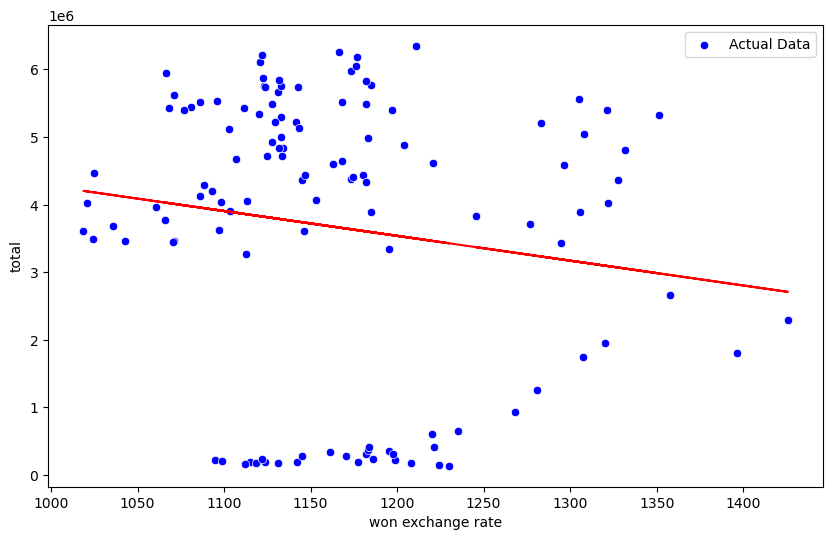

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 첫 번째 엑셀 파일 경로 지정
excel_file = 'C:/Users/emgkrla/Desktop/Data2/y.xlsx'

# 첫 번째 엑셀 파일 데이터를 DataFrame으로 읽기
df1 = pd.read_excel(excel_file)
print(df1)

# 두 번째 엑셀 파일 경로 지정
excel_file1 = 'C:/Users/emgkrla/Desktop/Data2/x.xlsx'

# 두 번째 엑셀 파일 데이터를 DataFrame으로 읽기
df2 = pd.read_excel(excel_file1)
print(df2)

# 데이터 시각화와 분석을 위한 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 두 DataFrame을 'year-month' 열을 기준으로 병합
merged_data = pd.merge(df1, df2, on='year-month')
print(merged_data)

# 독립 변수(X)와 종속 변수(y) 설정
X = merged_data['won exchange rate'].values.reshape(-1, 1)  # 'won exchange rate'(원 환율)를(을) 독립 변수로 설정
y = merged_data['total'].values  # 'total'(총합)을 종속 변수로 설정

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)  # 모델에 데이터를 학습시킴

# 학습된 모델을 사용하여 예측 값 계산
y_pred = model.predict(X)

# 실제 데이터와 회귀선 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_data['won exchange rate'], y=merged_data['total'], color='blue', label='Actual Data')  # 실제 데이터 점
plt.plot(merged_data['won exchange rate'], y_pred, color='red', label=f'Regression Line (R²={r2_score(y, y_pred):.2f})')  # 회귀선

# statsmodels를 사용하여 선형 회귀 모델 생성 및 학습
model = sm.OLS(y, X).fit()  # OLS(최소자승법) 회귀 모델을 학습

# 학습된 모델의 요약 통계 출력
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.749
Model:                            OLS   Adj. R-squared (uncentered):              0.747
Method:                 Least Squares   F-statistic:                              355.4
Date:                Mon, 02 Dec 2024   Prob (F-statistic):                    1.55e-37
Time:                        23:14:43   Log-Likelihood:                         -1835.6
No. Observations:                 120   AIC:                                      3673.
Df Residuals:                     119   BIC:                                      3676.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1572.9594     83.441     18.851      0.000    1407.737    1738.182
==============================================================================
Omnibus:                       32.357   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.663
Skew:                          -0.670   Prob(JB):                     0.000655
Kurtosis:                       1.933   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

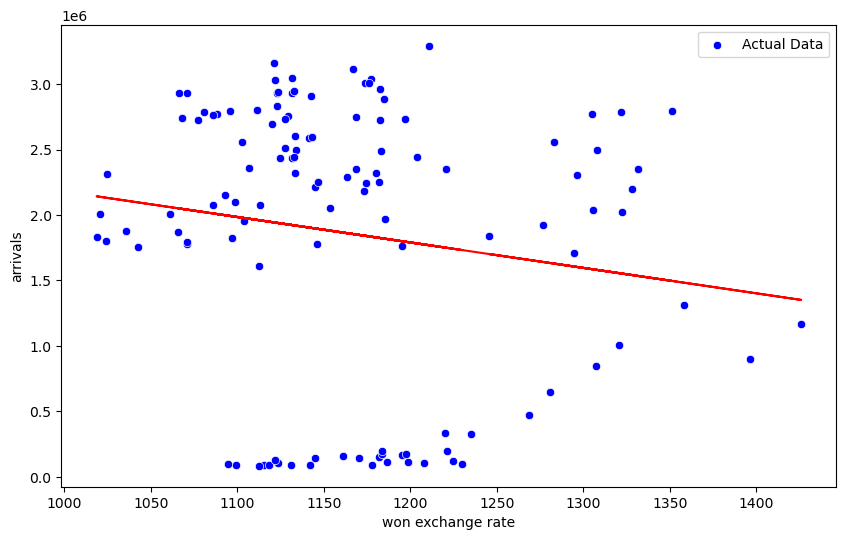

In [4]:
# 독립 변수(X)와 종속 변수(y1) 설정
X = merged_data['won exchange rate'].values.reshape(-1, 1)  # 'won exchange rate'(원 환율)를(을) 독립 변수로 설정
y1 = merged_data['arrivals'].values  # 'arrivals'(도착)을 종속 변수로 설정

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y1)  # 모델에 데이터를 학습시킴

# 학습된 모델을 사용하여 예측 값 계산
y1_pred = model.predict(X)

# 실제 데이터와 회귀선 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_data['won exchange rate'], y=merged_data['arrivals'], color='blue', label='Actual Data')  # 실제 데이터 점
plt.plot(merged_data['won exchange rate'], y1_pred, color='red', label=f'Regression Line (R²={r2_score(y, y_pred):.2f})')  # 회귀선

# statsmodels를 사용하여 선형 회귀 모델 생성 및 학습
model = sm.OLS(y1, X).fit()  # OLS(최소자승법) 회귀 모델을 학습

# 학습된 모델의 요약 통계 출력
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.748
Model:                            OLS   Adj. R-squared (uncentered):              0.746
Method:                 Least Squares   F-statistic:                              353.6
Date:                Mon, 02 Dec 2024   Prob (F-statistic):                    1.95e-37
Time:                        23:15:17   Log-Likelihood:                         -1834.2
No. Observations:                 120   AIC:                                      3670.
Df Residuals:                     119   BIC:                                      3673.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1550.4676     82.456     18.804      0.000    1387.196    1713.739
==============================================================================
Omnibus:                       31.162   Durbin-Watson:                   0.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.406
Skew:                          -0.664   Prob(JB):                     0.000744
Kurtosis:                       1.943   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

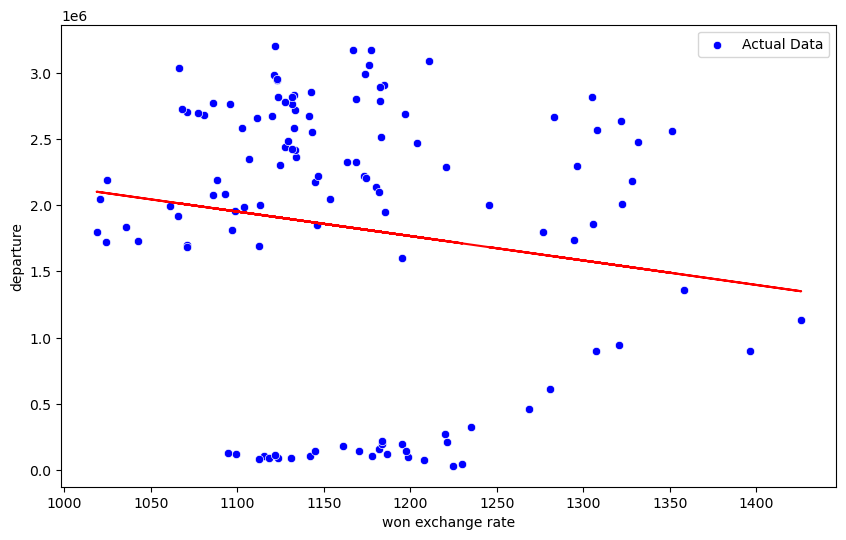

In [5]:
# 독립 변수(X)와 종속 변수(y2) 설정
X = merged_data['won exchange rate'].values.reshape(-1, 1)  # 'won exchange rate'(원 환율)를(을) 독립 변수로 설정
y2 = merged_data['departure'].values  # 'departure'(출발)을 종속 변수로 설정

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y2)  # 모델에 데이터를 학습시킴

# 학습된 모델을 사용하여 예측 값 계산
y2_pred = model.predict(X)

# 실제 데이터와 회귀선 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_data['won exchange rate'], y=merged_data['departure'], color='blue', label='Actual Data')  # 실제 데이터 점
plt.plot(merged_data['won exchange rate'], y2_pred, color='red', label=f'Regression Line (R²={r2_score(y, y_pred):.2f})')  # 회귀선

# statsmodels를 사용하여 선형 회귀 모델 생성 및 학습
model = sm.OLS(y2, X).fit()  # OLS(최소자승법) 회귀 모델을 학습

# 학습된 모델의 요약 통계 출력
model.summary()